<a href="https://colab.research.google.com/github/YinGuoX/Deep_Learning_Keras_WithDeeplizard/blob/master/8_Create_A_Confusion_Matrix_For_Neural_Network_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create A Confusion Matrix For Neural Network Predictions

在本集中，我们将演示如何创建一个混淆矩阵，这将有助于我们能够直观地观察到神经网络在推理过程中的预测能力。

我们将继续处理上一集中从tf.keras.Sequential模型获得的预测。

在上一节中，我们展示了如何使用一个训练过的模型来对它之前没有见过的测试集中的新数据进行推断。在那一集里提到过，我们有测试集的标签，但是我们没有把这些标签提供给网络。

此外，通过观察predictions，我们就能看到模型对测试集中每个样本的预测值。

下面是该模型对来自测试集的患者是否更有可能经历实验药物副作用的概率。


```
for i in predictions:
    print(i)
```
然后我们只看每个样本最有可能的预测。


```
for i in rounded_predictions:
  print(i)
```
尽管我们能够轻松地从模型中读取预测，但我们无法轻松地将预测与测试数据的真实标签进行比较。

使用混淆矩阵，我们将能够直观地观察模型对测试数据的预测情况。让我们跳到代码中了解这是如何实现的。

## 1.绘制混淆矩阵
首先，我们导入将要使用的所有必需库。

In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

我们将要绘制的混淆矩阵来自scikit-learn。

然后，我们创建混淆矩阵并将其分配给变量cm。

In [ ]:
# 准备数据
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

train_labels = []
train_samples = []

# 生成数据
for i in range(50):
    # 大约5%的年轻人确实经历过副作用
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    # 大约5%的老年人没有经历过副作用
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # 大约95%的年轻人没有经历过副作用
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    # 大约95%的老年人确实经历过副作用
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels,train_samples = shuffle(train_labels,train_samples)
print(train_samples.shape)

# 通过将每个特征缩放到给定的范围来转换特征。
scaler = MinMaxScaler(feature_range=(0,1))

scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))
# 我们只是根据fit_transform（）函数默认情况下不接受一维数据的情况，将数据重塑为2D。
print(train_samples.reshape(-1,1).shape)

(2100,)
(2100, 1)


In [ ]:


test_labels =  []

test_samples = []

for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [ ]:
# 创建并且编译模型
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# 训练模型
model.fit(
    x = scaled_train_samples,
    y = train_labels,
    validation_split=0.1,
    batch_size = 10,
    epochs = 30,
    verbose=2
)

Epoch 1/30
189/189 - 1s - loss: 0.6798 - accuracy: 0.5360 - val_loss: 0.6697 - val_accuracy: 0.5571
Epoch 2/30
189/189 - 0s - loss: 0.6590 - accuracy: 0.6042 - val_loss: 0.6475 - val_accuracy: 0.6476
Epoch 3/30
189/189 - 0s - loss: 0.6367 - accuracy: 0.6556 - val_loss: 0.6256 - val_accuracy: 0.6762
Epoch 4/30
189/189 - 0s - loss: 0.6142 - accuracy: 0.6937 - val_loss: 0.6022 - val_accuracy: 0.7238
Epoch 5/30
189/189 - 0s - loss: 0.5899 - accuracy: 0.7228 - val_loss: 0.5770 - val_accuracy: 0.7762
Epoch 6/30
189/189 - 0s - loss: 0.5645 - accuracy: 0.7709 - val_loss: 0.5507 - val_accuracy: 0.7952
Epoch 7/30
189/189 - 0s - loss: 0.5380 - accuracy: 0.8021 - val_loss: 0.5238 - val_accuracy: 0.8190
Epoch 8/30
189/189 - 0s - loss: 0.5111 - accuracy: 0.8217 - val_loss: 0.4968 - val_accuracy: 0.8429
Epoch 9/30
189/189 - 0s - loss: 0.4845 - accuracy: 0.8476 - val_loss: 0.4704 - val_accuracy: 0.8429
Epoch 10/30
189/189 - 0s - loss: 0.4590 - accuracy: 0.8661 - val_loss: 0.4459 - val_accuracy: 0.8667

In [ ]:
predictions = model.predict(
    x=scaled_test_samples,
    batch_size = 10,
    verbose=0
)

In [ ]:
rounded_predictions = np.argmax(predictions,axis=-1)
for i in rouunded_predictions:
  print(i)

1
1
0
0
0
1
0
0
1
1
1
0
1
0
0
0
1
1
1
1
1
1
1
0
0
1
0
1
0
1
1
1
0
1
1
0
0
0
1
0
0
0
0
1
0
0
0
1
1
1
0
0
1
1
1
1
0
1
1
1
1
0
1
0
0
1
0
1
0
1
1
1
1
0
1
1
0
1
0
1
0
0
0
1
1
0
1
1
1
1
1
1
0
1
1
0
0
1
1
0
0
1
1
1
1
0
1
1
0
0
0
1
1
1
0
0
1
0
1
1
1
0
0
0
0
0
1
0
0
1
1
1
1
1
1
1
1
0
1
1
1
1
0
1
1
1
1
0
0
0
0
1
1
1
1
0
0
0
0
0
0
1
1
0
0
1
1
0
1
1
1
0
0
0
0
1
0
0
0
0
1
1
0
1
1
0
0
0
1
1
1
0
1
0
1
1
0
0
0
0
0
1
1
0
1
1
0
0
0
1
0
0
0
1
0
0
0
1
1
0
0
0
1
0
0
0
1
0
0
0
1
0
1
1
0
1
0
0
1
1
1
1
0
0
0
0
0
1
0
0
0
1
1
0
1
1
1
0
1
1
0
1
0
1
1
1
0
0
1
0
1
0
1
0
0
1
0
1
1
0
1
1
0
1
1
1
1
0
1
0
0
1
0
0
1
0
1
0
1
1
1
0
0
1
1
0
0
1
1
0
1
0
0
1
0
1
1
1
1
0
1
1
0
0
1
0
1
1
0
0
1
1
0
1
1
0
1
1
0
1
0
0
1
1
0
0
1
1
0
1
1
0
1
0
1
1
0
1
0
0
1
1
0
0
1
1
1
1
0
0
0
0
0
1
0
1
0
0
1
1
1
1
1
0
0
0
0
1
1
0
1
0
0
1
1
0
0
1
0
1
0
0
0
1
1
1
0
1
0
0
0
1
0
0
0
0
0
1
1
1


In [ ]:
cm = confusion_matrix(y_true=test_labels,y_pred=rounded_predictions)


对于混淆矩阵，我们传递真实的标签test_labels以及网络对测试集的预测标签rounded_predictions。

下面，我们有一个直接来自[scikit-learn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py)的名为plot_confusion_matrix（）的函数。 他们提供的代码是为了绘制混淆矩阵。

In [ ]:
def plot_confusion_matrix(cm, classes,
              normalize=False,
              title='Confusion matrix',
              cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

接下来，我们定义混淆矩阵的标签。在我们的例子中，标签的标题是“无副作用”和“有副作用”。

最后，我们使用刚才讨论的plot_confusion_matrix（）函数绘制混淆矩阵。 对于此功能，我们传入混淆矩阵cm和标签cm_plot_labels以及混淆矩阵的标题。

Confusion matrix, without normalization
[[192  18]
 [ 10 200]]


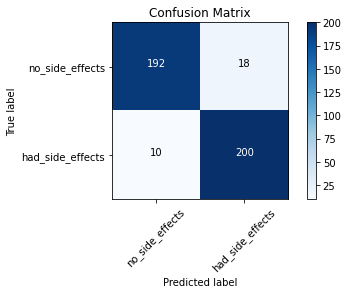

In [ ]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

## 2. 理解混淆矩阵
看看混淆矩阵的图，我们在x轴上有预测的标签，在y轴上有真实的标签。从左上角到右下角的蓝色单元格包含了模型准确预测的样本数量。白单元格中包含的样本数量是被错误预测的。

测试集共有420个样本，从混淆矩阵可以看出，模型准确预测了420个样本中的392个。该模型错误地预测了420个国家中的28个。

对于模型训练正确的样本，我们可以看到它准确地预测出192个患者将不会出现副作用。 它错误地预测：当10个患者实际经历副作用时，这些患者被预测没有副作用。

另一方面，该模型准确地预测出200个患者将遭受的副作用。它错误地预测到当18个患者实际上没有副作用时，该患者会产生副作用。

如您所见，这是一种很好的方式，我们可以直观地解释模型在预测时的表现，并了解模型可能需要进行哪些工作。